# Hierarchical Clustering

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [ ]:
data_df =  kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "smayanj/netflix-users-database",
    "Mall_Customers.csv",
)
mc_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
mc_df["Gender"] = mc_df["Gender"].apply(lambda x: 1 if x == "Male" else 0)

In [ ]:
mc_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [ ]:
mc_df.iloc[:, 1:]

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


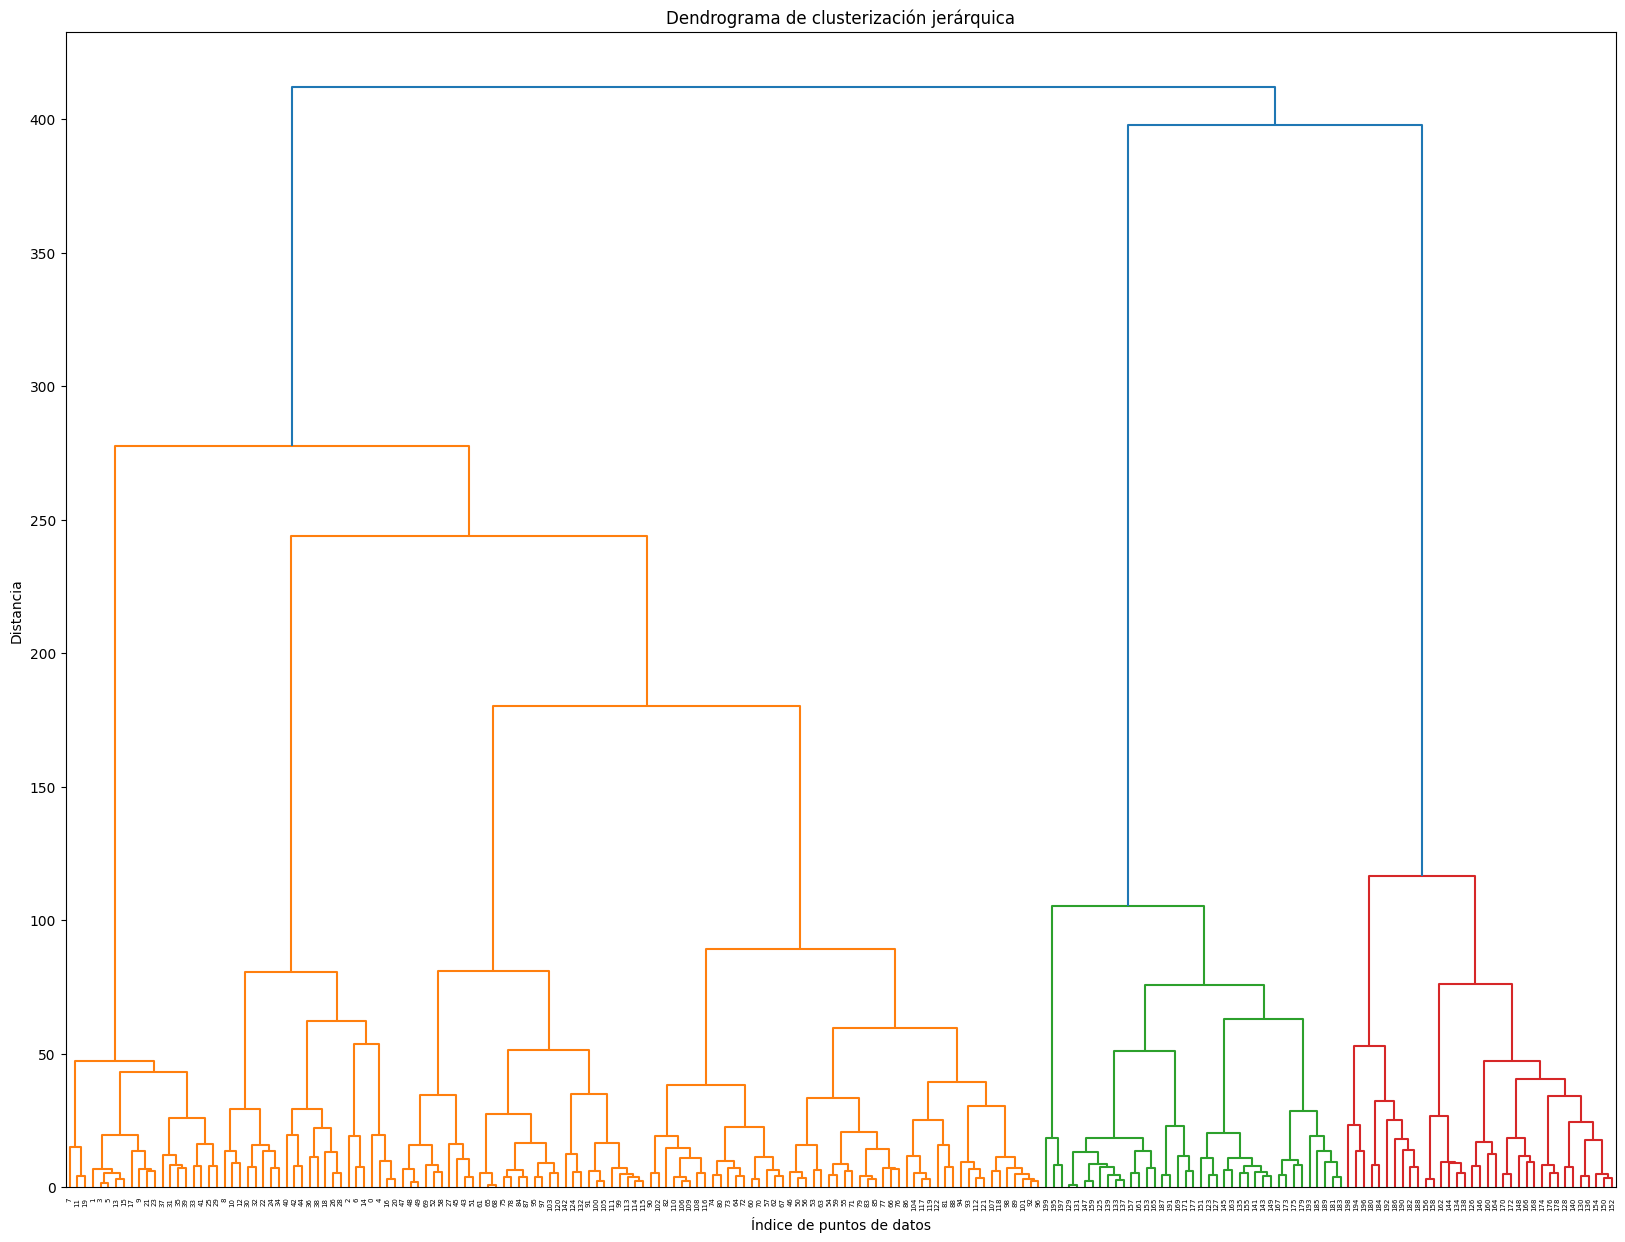

In [ ]:
X = mc_df.iloc[:, 1:]
Z = linkage(X, method='ward', metric="euclidean")

# Graficar el dendrograma
plt.figure(figsize=(20, 15))
dendrogram(Z)
plt.title('Dendrograma de clusterización jerárquica')
plt.xlabel('Índice de puntos de datos')
plt.ylabel('Distancia')
plt.show()

In [ ]:
n_clusters = 5
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters,  linkage='ward')
labels = agg_clustering.fit_predict(X)

In [ ]:
mc_df["cluster"] = labels

In [ ]:
mc_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,4
1,2,1,21,15,81,3
2,3,0,20,16,6,4
3,4,0,23,16,77,3
4,5,0,31,17,40,4


<Axes: title={'center': 'Clusters of customers'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

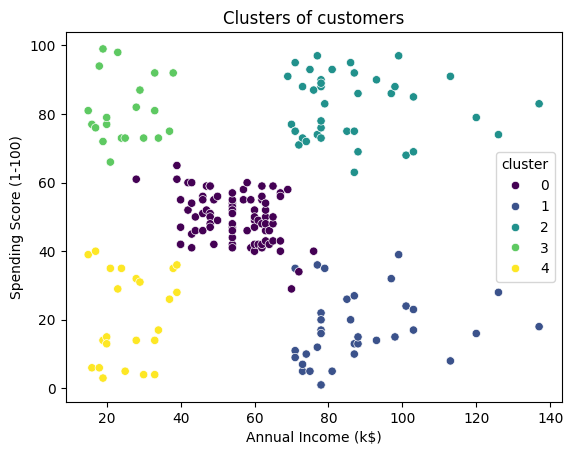

In [ ]:
plt.title("Clusters of customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
sns.scatterplot(x="Annual Income (k$)",
                y="Spending Score (1-100)",
                hue="cluster",
                palette="viridis",
                data=mc_df)

El cluster que podría resultar más interesante para el mall es el cluster 2. Puesto que tienen de las calificaciones más altas como consumidores y además tienen los más altos ingresos, arriba de 70k dolares anuales.

Seguido de este cluster, podría también considerarse el cluster 0 que si bien no tienen un score muy alto (entre 40 y 60 puntos), este no es malo y además sus ganancias se ubican en un nivel intermedio.

¿Cuál es el grupo menos interesante?


<Axes: xlabel='cluster', ylabel='Age'>

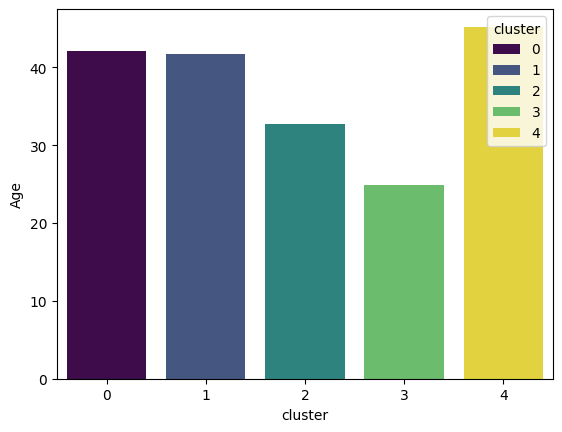

In [ ]:
grouped_age = mc_df.groupby("cluster")["Age"].mean().reset_index()
sns.barplot(x="cluster",
            y="Age",
            hue="cluster",
            palette="viridis",
            data=grouped_age,)

De la gráfica anterior se observa que los grupos más interesantes para el mall (el grupo 0 y el 2) tienen una edad promedio de 42 y 33 años respectivamente. Esto podría permitir enfocar esfuerzos en campañas de adquisición de clientes que se ubiquen en este rango de edad.

<Axes: xlabel='cluster', ylabel='count'>

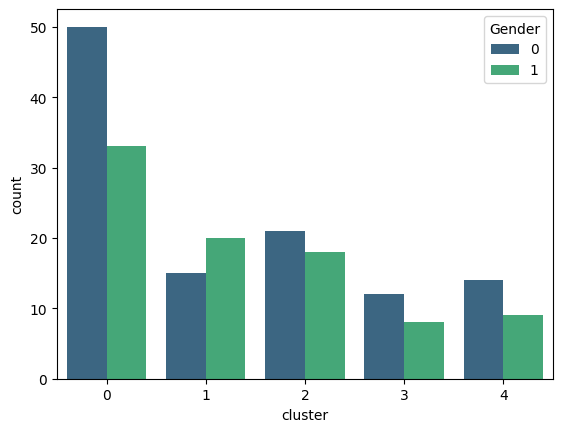

In [ ]:
grouped_gender = mc_df.groupby("cluster")["Gender"].value_counts().reset_index()
grouped_gender
sns.barplot(x="cluster",
            y="count",
            hue="Gender",
            palette="viridis",
            data=grouped_gender)

Tanto el grupo 0 como el grupo 2, están compuestos en su mayoría por personas del genero femenino, al contrario del grupo 1, que aunque tienen un alto ingreso su score como usuarios es bajo. Por lo que las campañas de adquisición podrían centrarse en usuarios del genero femenino.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

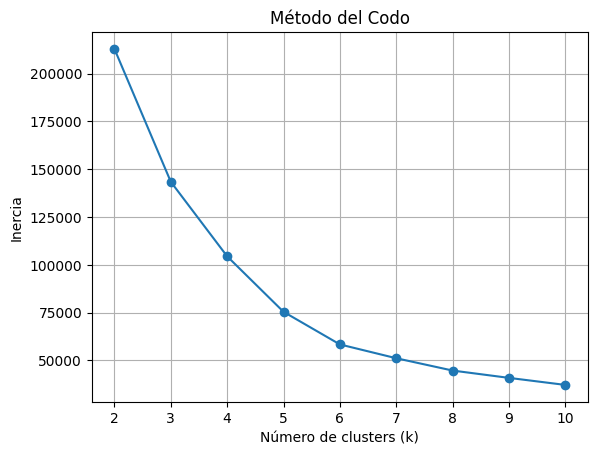

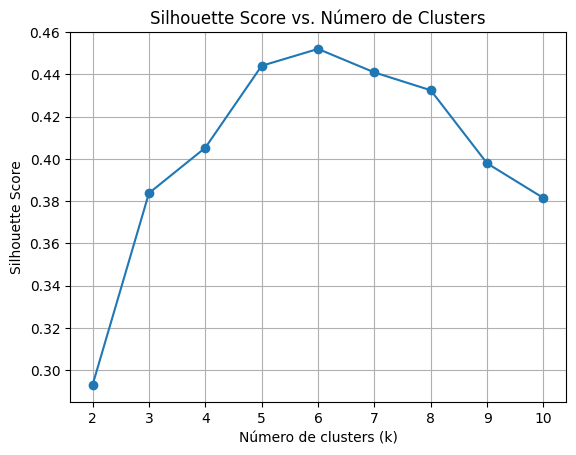

In [ ]:
inertia = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.xticks(k_values)
plt.grid()
plt.show()

# silhouette_score
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)

    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Número de Clusters')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

mc_df["cluster_kmeans"] = labels

<Axes: title={'center': 'Clusters of customers'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

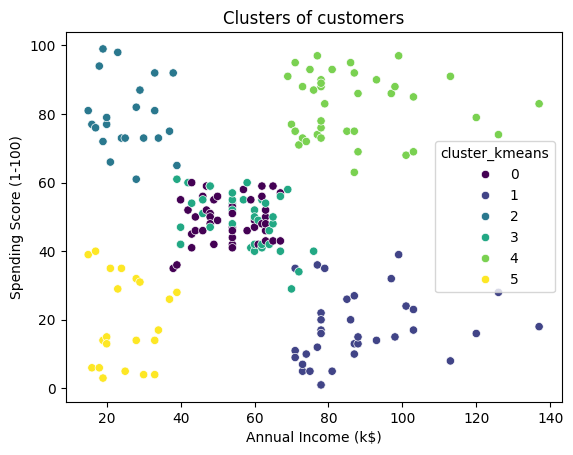

In [ ]:
plt.title("Clusters of customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
sns.scatterplot(x="Annual Income (k$)",
                y="Spending Score (1-100)",
                hue="cluster_kmeans",
                palette="viridis",
                data=mc_df)